    1. follow @tgiorgetti on twitter and steal/download his videos

    2a. ffmpeg -ss 00:00 -i stolen_video.mp4 -t 02:48 images_%03d.tiff 

or

    2b. ffmpeg -i /home/fer/Videos/stolen_video.mp4 images_%03d.tiff

In [103]:
%matplotlib inline
import os, glob
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [104]:
mypath='/home/fer/Pictures/stolenimages/'
lista = []
for infile in sorted(glob.glob( os.path.join(mypath, '*.tiff')) ):
    lista.append(infile)

In [105]:
print(len(lista)) #number of images

74


In [106]:
time = np.linspace(0,74./30,74) #30 frames per second

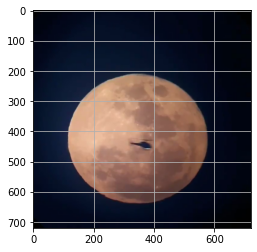

In [107]:
plt.imshow(img.imread(lista[37])) #sneak peeking before clipping
plt.grid()

In [108]:
cubo0,cubo1,cubo2 = [],[],[]
for i in range(len(lista)):
    #print(lista[i])
    im = img.imread(lista[i])
    im0 = im[170:670,90:600,0] #clipping every image layer
    im1 = im[170:670,90:600,1]
    im2 = im[170:670,90:600,2]
    val0 = np.sum(im0)         #summation of brightness
    val1 = np.sum(im1)
    val2 = np.sum(im2)
    cubo0.append(val0)         #append to a list
    cubo1.append(val1)
    cubo2.append(val2)

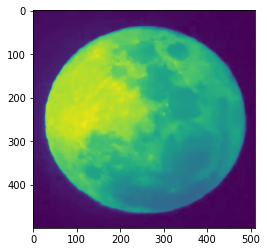

In [109]:
plt.imshow(im0) #sneak peeking after clipping

In [131]:
signal.detrend?

In [223]:
curva0 = signal.detrend(cubo0,type='linear')
curva1 = signal.detrend(cubo1,type='linear')
curva2 = signal.detrend(cubo2,type='linear')

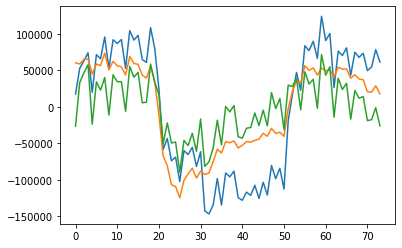

In [224]:
plt.plot(curva0)
plt.plot(curva1)
plt.plot(curva2)


In [188]:
c0 = (curva0-np.min(curva0))/np.max(curva0) #normalize every layer curve
c1 = (curva1-np.min(curva1))/np.max(curva1)
c2 = (curva2-np.min(curva2))/np.max(curva2)

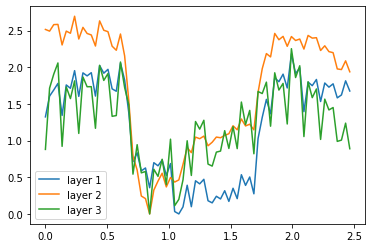

In [189]:
plt.plot(time,c0,label='layer 1')
plt.plot(time,c1,label='layer 2')
plt.plot(time,c2,label='layer 3')
plt.legend()

In [247]:
m0 = np.mean([c0[0:20],c0[53:73]])-np.mean(c0[21:52]) # quality index of (transit curve + detrend process) 
m1 = np.mean([c1[0:20],c1[53:73]])-np.mean(c1[21:52]) 
m2 = np.mean([c2[0:20],c2[53:73]])-np.mean(c2[21:52])

In [248]:
print(m0,m1,m2)

1.3378264320537254 1.5389184836591103 0.7462828891138764


In [249]:
w0=m0/(m0+m1+m2) # building the weighting indices
w1=m1/(m0+m1+m2)
w2=m2/(m0+m1+m2)

In [250]:
print(w0,w1,w2)

0.36925646285999536 0.42476032936013197 0.2059832077798726


In [251]:
transit = np.mean([c0*w0,c1*w1,c2*w2],axis=0)
transit = (transit -np.min(transit))/np.max(transit) #normalize the weighted curve
transit = transit - 1                                #cosmetic substraction
error = np.std([c0*w0,c1*w1,c2*w2],axis=0)

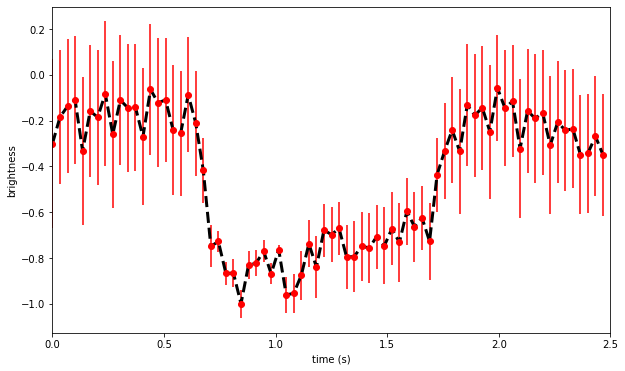

In [252]:
plt.figure(figsize=(10,6))
plt.errorbar(time,transit,yerr=error,fmt='o',color='r')
plt.plot(time,transit,'k--',lw=3)
plt.xlim(-0.0,2.50)
plt.xlabel('time (s)')
plt.ylabel('brightness')
plt.savefig('tiagocoptero.png')